# SYNCLUS results within MDS

In [1]:
from scripts.ClusterTS_MDS import ClusterVTECDataMDS
from numpy import loadtxt, float64
from sklearn.metrics import rand_score, adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score, v_measure_score

from matplotlib import rcParams

rcParams.update({
    "text.usetex": True
})

In [2]:
PTEX_dissim = loadtxt("./data/PTEX_DTW_matrix.dat", dtype= float64, delimiter = ",")

SMACOF-dissim-classic with 2 components has a stress-1 value of 0.102251


np.float64(0.10225106282901285)

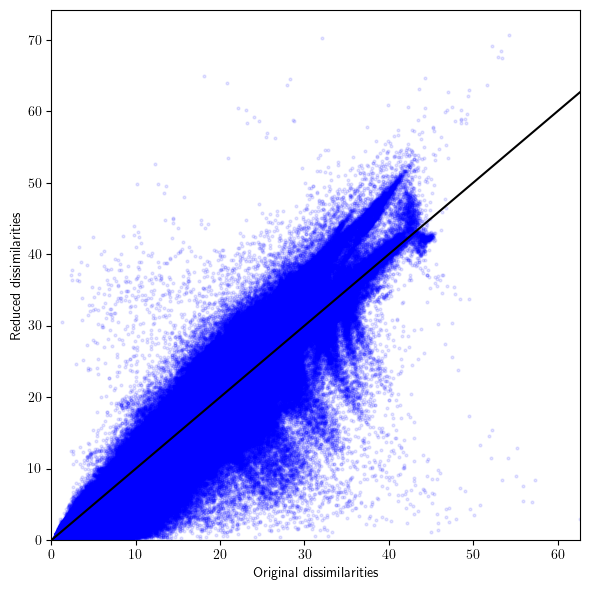

In [3]:
TEC_ClusterSeries = ClusterVTECDataMDS(dissimilarity = PTEX_dissim)
TEC_ClusterSeries.ComputeMDS(num_comps_mds = 2, method = "SMACOF-dissim-classic", max_iter = 1000, eps = 1e-6, verbose = 0)

--Scores with K-Means clustering--
SH coefficient = 0.7141837249649502
CH index = 12204.824349687655
DB index = 0.4499502390236356
--Total series for every cluster--
0 -> 2447
1 -> 1245
2 -> 621


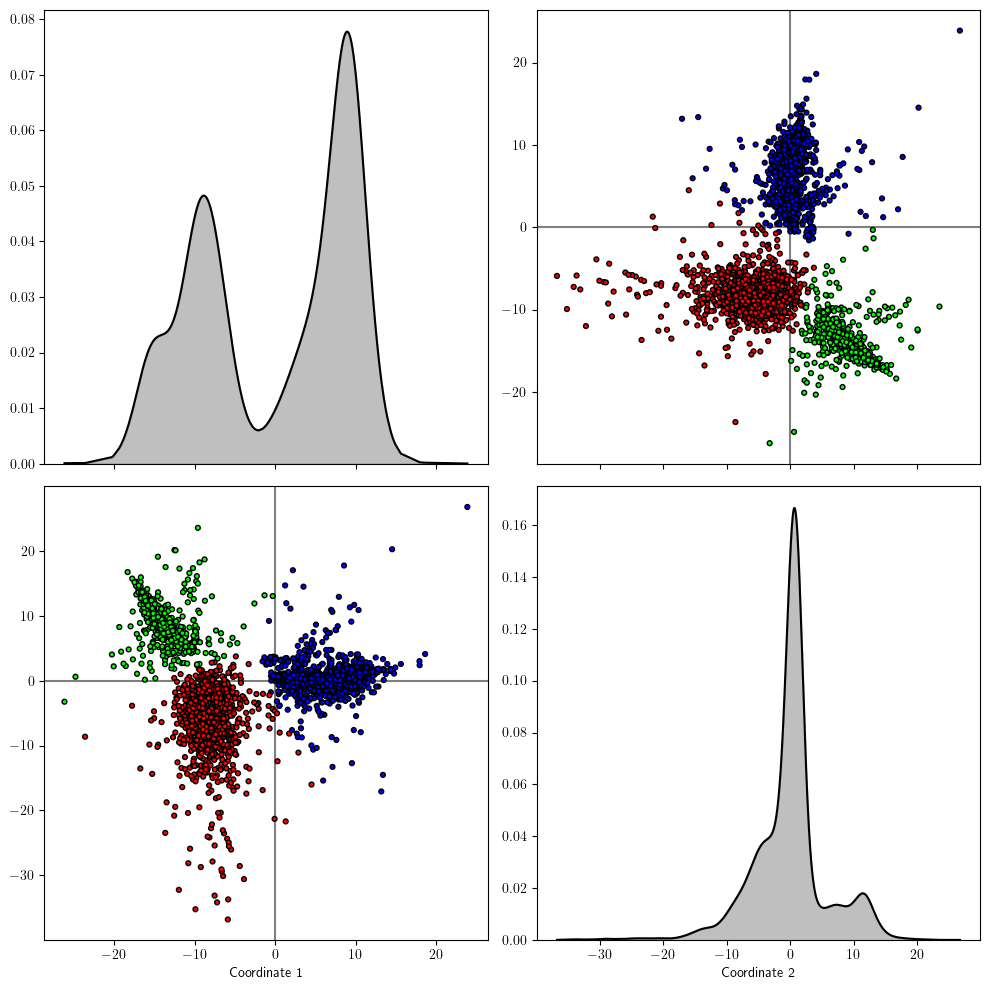

In [4]:
TEC_ClusterSeries.ClusterTSVectors(num_clusters = 3, cluster_method = "K-Means")
TEC_ClusterSeries.VisualizeClustering()

In [5]:
MDS_Labels = TEC_ClusterSeries.Xc_Labels
SYNCLUS_Labels = loadtxt("./data/PTEX_SYNCLUS_Labels.dat", dtype = int).flatten()

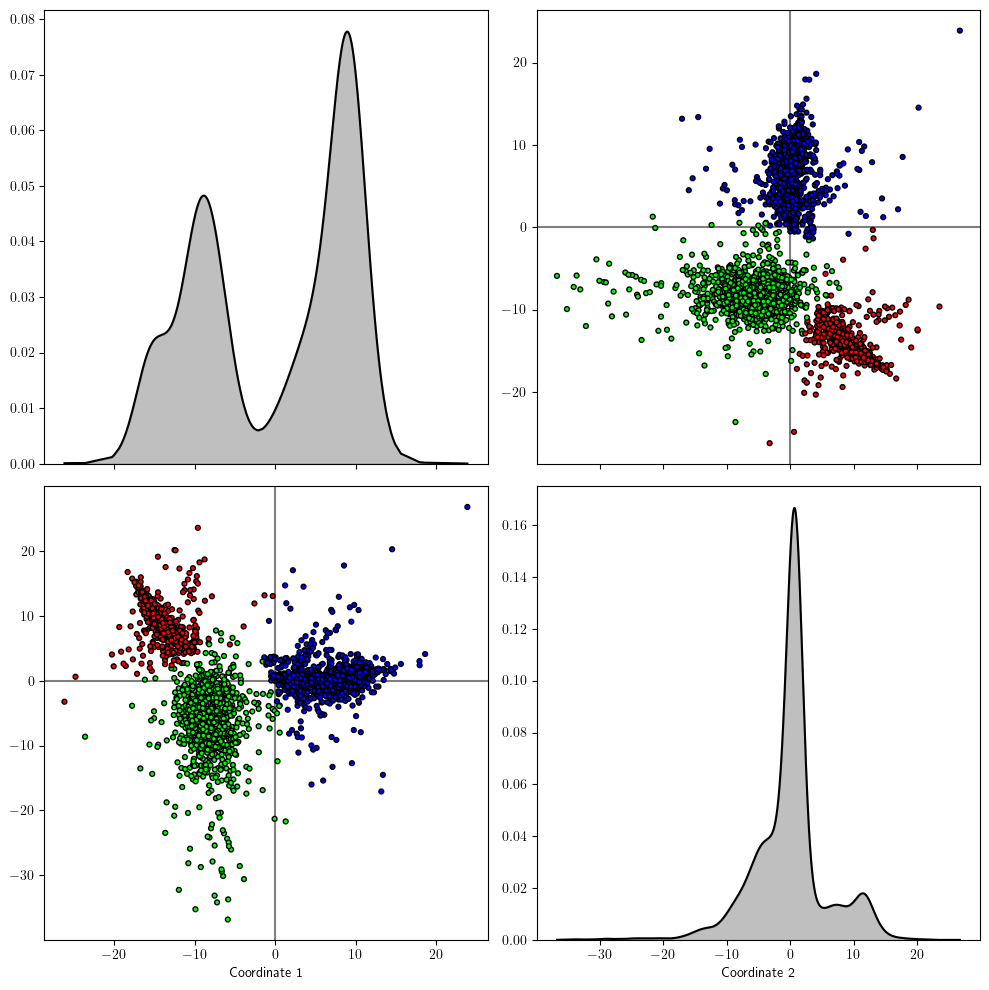

In [6]:
TEC_ClusterSeries.VisualizeClustering(Labels = SYNCLUS_Labels)

In [7]:
Rand_MDS_SYNCLUS = rand_score(MDS_Labels, SYNCLUS_Labels)
AdjRand_MDS_SYNCLUS = adjusted_rand_score(MDS_Labels, SYNCLUS_Labels)
NMI_MDS_SYNCLUS = normalized_mutual_info_score(MDS_Labels, SYNCLUS_Labels)
AMI_MDS_SYNCLUS = adjusted_mutual_info_score(MDS_Labels, SYNCLUS_Labels)
VMeas_MDS_SYNCLUS = v_measure_score(MDS_Labels, SYNCLUS_Labels)

In [8]:
print("Rand Index = ", Rand_MDS_SYNCLUS)
print("Adjusted Rand Index = ", AdjRand_MDS_SYNCLUS)
print("NMI = ", NMI_MDS_SYNCLUS)
print("AMI = ", AMI_MDS_SYNCLUS)
print("V-Measure = ", VMeas_MDS_SYNCLUS)

Rand Index =  0.9934549816385463
Adjusted Rand Index =  0.9866212309804042
NMI =  0.9652458775321455
AMI =  0.9652290175642774
V-Measure =  0.9652458775321456
